In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [2]:
# read_data("results/indexTerms-all-taxon.tsv")

In [3]:
import re
regex = re.compile('[^a-z ]')

def clean_responses(responses):
    return ",".join([regex.sub("", str(r).lower()) for r in responses])

def read_data(rank, path):
    df = pd.read_csv(open(path, "r"), sep="\t")
    df["query rank"] = df["query"].apply(lambda x: x.split()[2])
    df["subject rank"] = rank
    df["question number"] = df["question number"].apply(lambda x: f"{path}:{str(x)}")
    responses = df[["responses", "question number"]].groupby("question number")["responses"].apply(list).apply(clean_responses)
    df = df.drop("responses", axis=1).drop_duplicates().set_index("question number")
    df["responses"] = responses
    return df

ranks = [
    "kingdom",
    "phylum",
    "class",
    "order",
    "family",
    "genus",
    "specificepithet"
]

data_ranks = [
    "phylum",
    "class",
    "order",
    "family",
    "genus",
    # "results/indexTerms-all-taxon.tsv",
]

results = pd.concat([read_data(rank, f"results/idigbio-sample/indexTerms-{rank}.tsv") for rank in data_ranks])
# results[ranks] = results[ranks].fillna("")
results = results[["query rank", "subject rank", "taxon", "responses"]]

In [4]:
results.head(1)

,query rank,subject rank,taxon,responses
question number,,,,
results/indexTerms-phylum.tsv:0,kingdom,phylum,annelida,"animalia,animalia,animalia,animalia,animalia,a..."


In [22]:
results.to_csv("results/idigbio-sample/rank-predictions.tsv", sep="\t")

In [5]:
def score_responses(target, responses):
    return sum([r == target for r in responses])

results["score"] = results.apply(lambda x: score_responses(x[x["query rank"]], x["responses"]), axis=1)

KeyError: 'kingdom'

In [ ]:
results["subject rank"].value_counts()

subject rank
specificepithet    20055
family               416
order                267
class                104
phylum                25
Name: count, dtype: int64

In [159]:
results.groupby("query rank")["score"].mean()

query rank
class      6.099191
family     6.770381
kingdom    9.389395
order      5.787606
phylum     7.184211
Name: score, dtype: float64

In [158]:
results.groupby("subject rank")["score"].mean()

subject rank
class              7.528846
family             6.370192
order              7.239700
phylum             9.160000
specificepithet    7.070057
Name: score, dtype: float64

<Axes: >

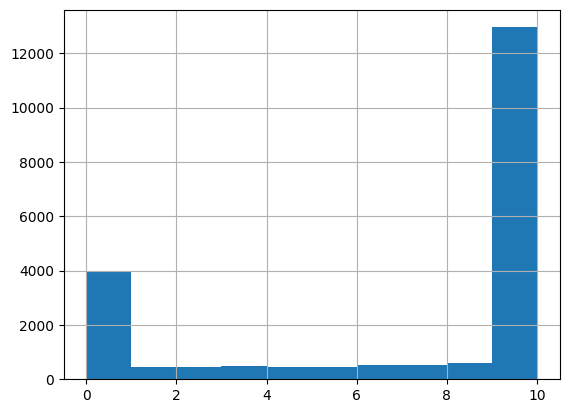

In [160]:
results["score"].hist()

In [168]:
results[results["family"] == "dicotyledon"]

,kingdom,phylum,class,order,family,genus,specificepithet,query rank,subject rank,responses,score
question number,,,,,,,,,,,


In [169]:
results.groupby(["kingdom", "phylum"])["score"].count()

kingdom   phylum         
animalia  annelida            876
          arthropoda         2192
          brachiopoda         587
          bryozoa             825
          chordata           1083
          cnidaria            683
          echinodermata       631
          mollusca           1702
          porifera            446
fungi     ascomycota         1603
          basidiomycota      1818
          chytridiomycota     378
          cyanobacteria        50
          fungi                 1
          glomeromycota       216
          zygomycota          186
plantae   bryophyta          1136
          charophyta          756
          chlorophyta         496
          dicotyledon           1
          magnoliophyta       111
          marchantiophyta     806
          rhodophyta          996
          spermatophyta       647
          tracheophyta       2641
Name: score, dtype: int64

<Axes: ylabel='kingdom,phylum'>

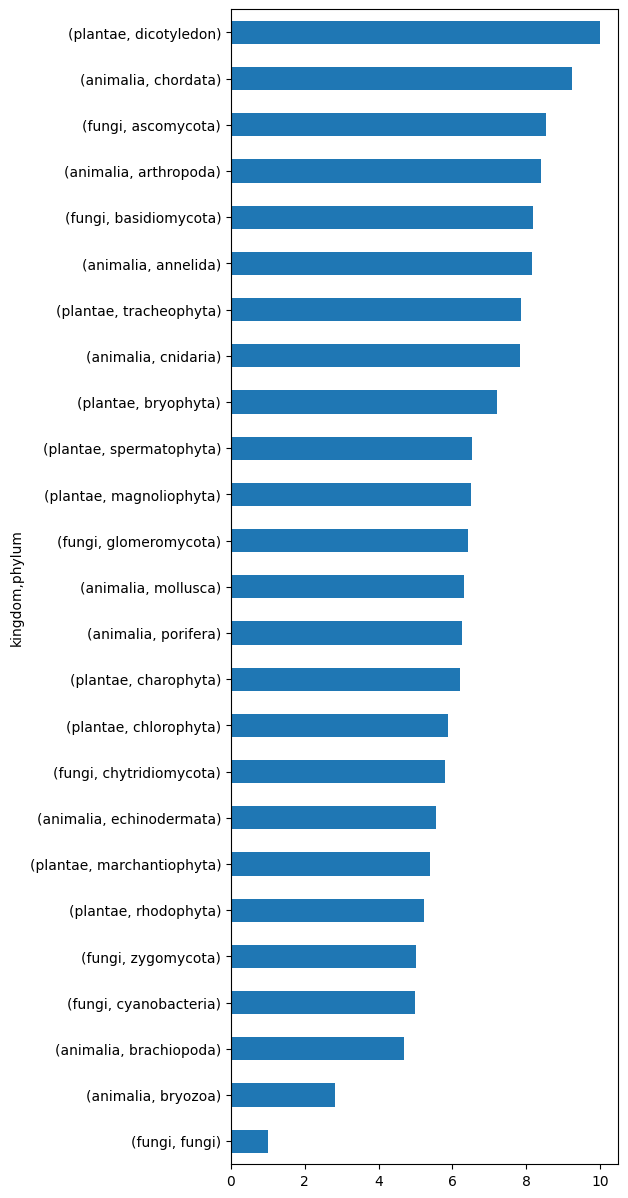

In [161]:
results.groupby(["kingdom", "phylum"])["score"]\
    .mean().sort_values()\
        .plot.barh(title="Average score by phylum", figsize=(5,15))

<Axes: ylabel='kingdom,phylum,class,order'>

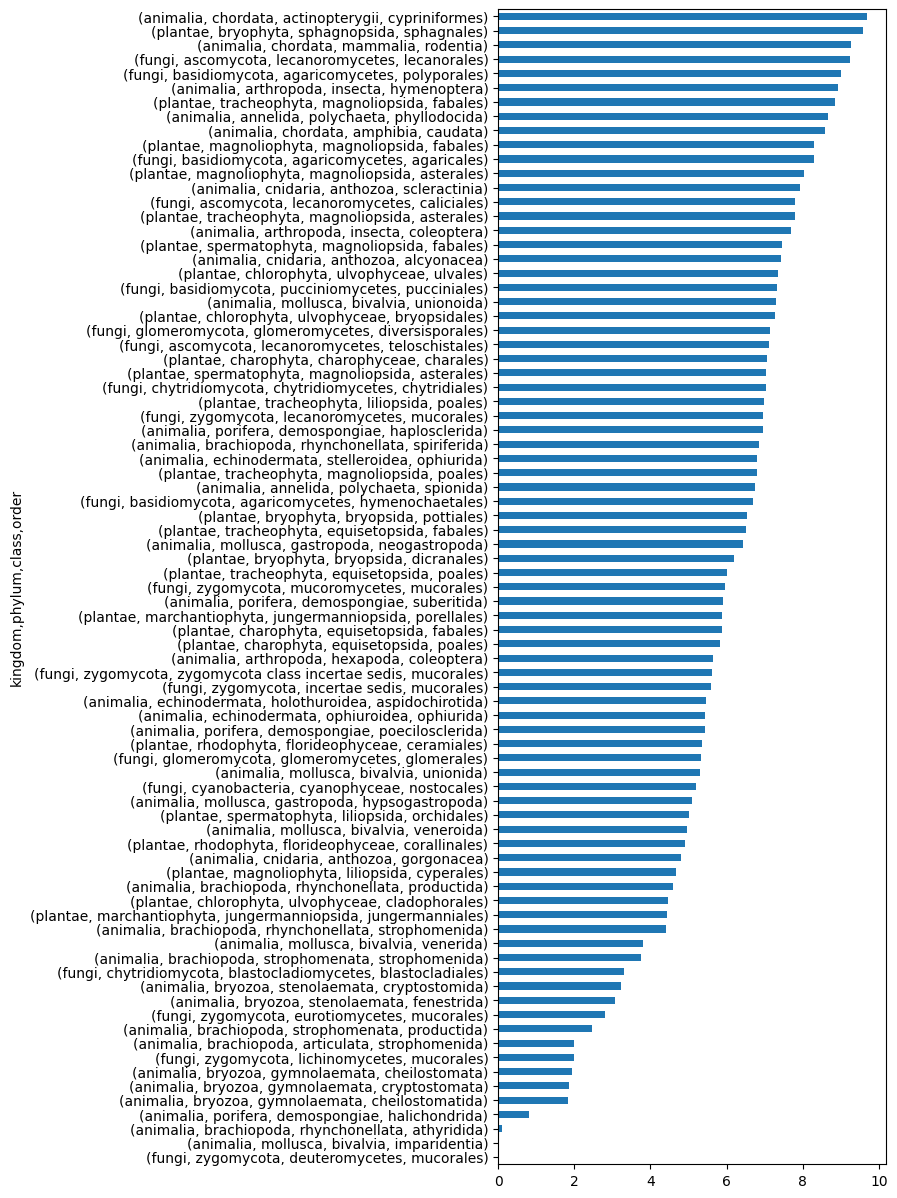

In [21]:
results.groupby(["kingdom", "phylum", "class", "order"])["score"]\
    .mean().sort_values()\
        .plot.barh(title="Average response score by order", figsize=(5,15))

In [41]:
results

,kingdom,phylum,class,order,family,genus,specificepithet,query,input token count,output token count,responses,score
question number,,,,,,,,,,,,
0,animalia,annelida,polychaeta,phyllodocida,nereididae,nereis,vexillosa,kingdom,28,20,"[animalia, animalia, animalia, animalia, anima...",10
1,animalia,annelida,polychaeta,phyllodocida,nereididae,nereis,vexillosa,phylum,29,33,"[annelida, annelida, annelida, annelida, annel...",10
2,animalia,annelida,polychaeta,phyllodocida,nereididae,nereis,vexillosa,class,28,40,"[polychaeta, polychaeta, polychaeta, polychaet...",10
3,animalia,annelida,polychaeta,phyllodocida,nereididae,nereis,vexillosa,order,28,50,"[phyllodocida, phyllodocida, phyllodocida, phy...",10
4,animalia,annelida,polychaeta,phyllodocida,nereididae,nereis,vexillosa,family,28,50,"[nereididae, nereididae, nereididae, nereidida...",10
...,...,...,...,...,...,...,...,...,...,...,...,...
20050,plantae,tracheophyta,liliopsida,poales,poaceae,muhlenbergia,arenicola,kingdom,30,20,"[plantae, plantae, plantae, plantae, plantae, ...",10
20051,plantae,tracheophyta,liliopsida,poales,poaceae,muhlenbergia,arenicola,phylum,31,70,"[magnoliophyta, magnoliophyta, muhlenbergia ar...",1
20052,plantae,tracheophyta,liliopsida,poales,poaceae,muhlenbergia,arenicola,class,30,70,"[muhlenbergia arenicola belongs to, muhlenberg...",3


In [29]:
results.groupby(["kingdom", "phylum", "class", "order", "family"])["score"].mean().sort_values()

kingdom   phylum       class            order          family         
animalia  mollusca     bivalvia         imparidentia   veneridae          0.000000
          brachiopoda  rhynchonellata   spiriferida    spirigerellidae    0.000000
fungi     zygomycota   deuteromycetes   mucorales      mucoraceae         0.000000
animalia  brachiopoda  rhynchonellata   athyridida     spirigerellidae    0.105263
          porifera     demospongiae     halichondrida  halichondriidae    0.800000
                                                                            ...   
          chordata     mammalia         rodentia       cricetidae         9.273846
          arthropoda   insecta          hymenoptera    formicidae         9.475000
plantae   bryophyta    sphagnopsida     sphagnales     sphagnaceae        9.571930
fungi     ascomycota   lecanoromycetes  lecanorales    cladoniaceae       9.666667
animalia  chordata     actinopterygii   cypriniformes  cyprinidae         9.690476
Name: score, Len